In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

In [22]:
# Load datasets
drivers_df = pd.read_csv('data/drivers.csv')
constructors_df = pd.read_csv('data/constructors.csv', usecols=['constructorId', 'constructorRef'])
races_df = pd.read_csv('data/races.csv')
results_df = pd.read_csv('data/results.csv')
status_df = pd.read_csv('data/status.csv')

# Merge in other datasets
results_df = results_df.merge(races_df[['raceId', 'date']], on='raceId')
results_df = results_df.merge(status_df, on='statusId')
results_df = results_df.merge(constructors_df, on='constructorId')

# Sort by date
results_df['date'] = pd.to_datetime(results_df['date'])
results_df = results_df.sort_values(by='date')

drop_cols = ['resultId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'constructorId']

df = results_df[results_df.date.dt.year >= 2020].drop(columns=drop_cols)
df = df.replace({'renault':'alpine'})
df.constructorRef.unique()

array(['williams', 'ferrari', 'mercedes', 'racing_point', 'mclaren',
       'alpine', 'haas', 'red_bull', 'alphatauri', 'alfa', 'aston_martin'],
      dtype=object)

(50.0, 100.0)

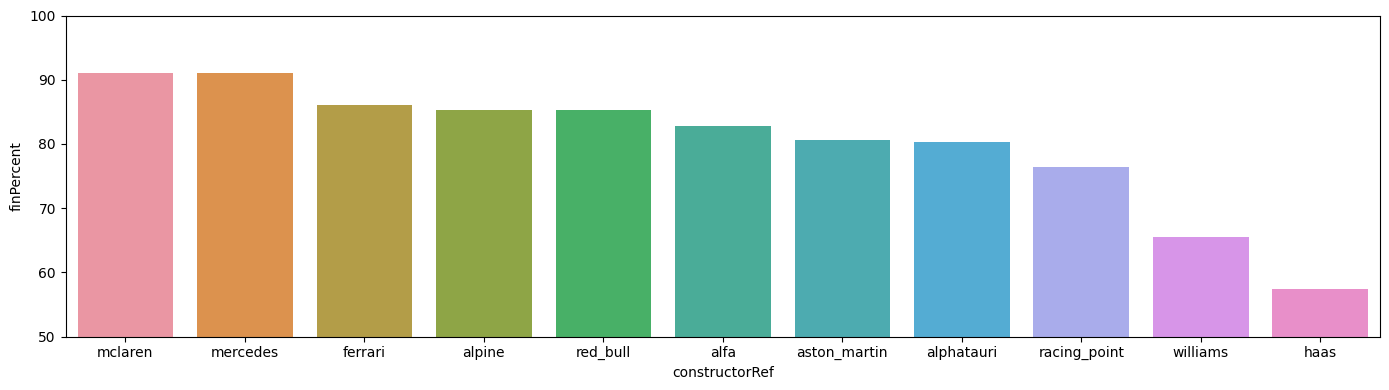

In [23]:
# counts = counts.sort_values(by='statusId', ascending=False)
# counts
# plt.figure(figsize=(16, 5), tight_layout=True)
# sns.barplot(data=counts.head(18), x='constructorRef', y='statusId')

counts = df[(df.status == 'Finished') | (df.status == '+1 Lap')].groupby('constructorRef').count().drop(columns=['raceId', 'driverId', 'date', 'status']).reset_index().rename(columns={'statusId':'finished'})
totals = df.groupby('constructorRef').count().drop(columns=['raceId', 'driverId', 'date', 'status']).reset_index().rename(columns={'statusId':'total'})
totals = totals.merge(counts, on='constructorRef')
totals['finPercent'] = totals['finished'] / totals['total'] * 100
totals.sort_values(by='finPercent', inplace=True, ascending=False)
plt.figure(figsize=(14, 4), tight_layout=True)
sns.barplot(data=totals, x='constructorRef', y='finPercent')
plt.yticks([50, 60, 70, 80, 90, 100])
plt.ylim(50, 100)

In [24]:
totals

,constructorRef,total,finished,finPercent
6,mclaren,122,111,90.983607
7,mercedes,122,111,90.983607
4,ferrari,122,105,86.065574
2,alpine,122,104,85.245902
9,red_bull,122,104,85.245902
0,alfa,122,101,82.786885
3,aston_martin,88,71,80.681818
1,alphatauri,122,98,80.327869
8,racing_point,34,26,76.470588
10,williams,122,80,65.573770


In [40]:
# status_counts = df[df.constructorId == 1].groupby('status').count().drop(columns=['driverId', 'constructorId', 'date', 'raceId']).reset_index()
# status_counts.sort_values(by='statusId', inplace=True, ascending=False)
# plt.figure(figsize=(12, 4))
# sns.barplot(data=status_counts.tail(-2).head(5), x='status', y='statusId')